# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [10]:
from sklearn.cluster import DBSCAN

import string

import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('white')

%matplotlib inline

DBSCAN is a method of dynamically identifying clusters in a dataset. It searches for the amount of clusters based on two parameters:

- `eps` -> the masx distance between two points for them to be considered 'close' 
- `min_samples` -> the minimum amount of samples a point should be 'close' to before it is considered to be a core point

DBSCAN goes through all points and determines if a point is close enough to other points to be in the same cluster. A core feature is that most points are classified as 'core points' for the current cluster. But other points, where there are not enough other points close by, are classified as boundary points. If a point is not designated as a boundary point (in the neighborhood of a core point) or a core point itself by this algorithm it is considered to be noise.

In [13]:
df = pd.read_csv("./data/example1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int64
 1   1       6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


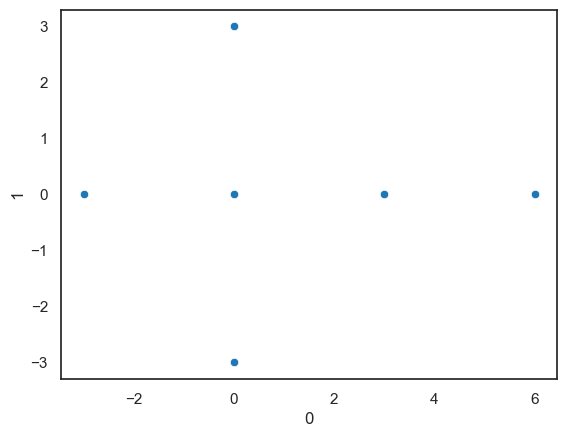

In [14]:
sns.scatterplot(df, x='0', y='1');

C:\Users\Florian-Music\AppData\Local\Temp\ipykernel_37364\110786849.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(t, (p[1][0] + 0.2, p[1][1]))


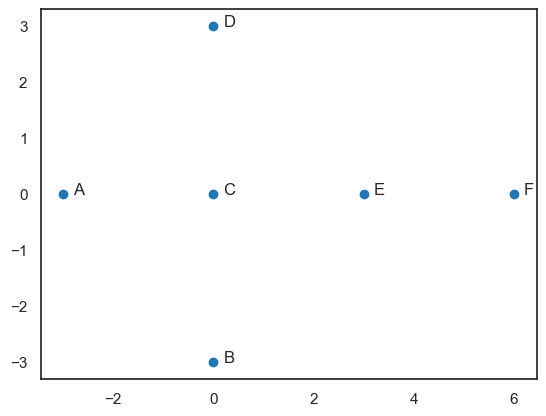

In [15]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'])
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

## DBSCAN handwriting analysis

In [16]:
df = pd.read_csv("./data/012.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
 3   3       3 non-null      int64
 4   4       3 non-null      int64
 5   5       3 non-null      int64
 6   6       3 non-null      int64
 7   7       3 non-null      int64
 8   8       3 non-null      int64
 9   9       3 non-null      int64
 10  10      3 non-null      int64
 11  11      3 non-null      int64
 12  12      3 non-null      int64
 13  13      3 non-null      int64
 14  14      3 non-null      int64
 15  15      3 non-null      int64
 16  16      3 non-null      int64
 17  17      3 non-null      int64
 18  18      3 non-null      int64
 19  19      3 non-null      int64
 20  20      3 non-null      int64
 21  21      3 non-null      int64
 22  22      3 non-null      int64
 23  23      3 non-null 

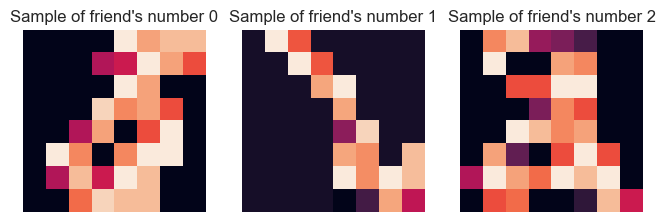

In [17]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in friend_digits)
c = 3
fig, ax = plt.subplots(1, c, sharex='col', sharey='row')
for j in range(c):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [19]:
digits, y = load_digits(return_X_y=True)

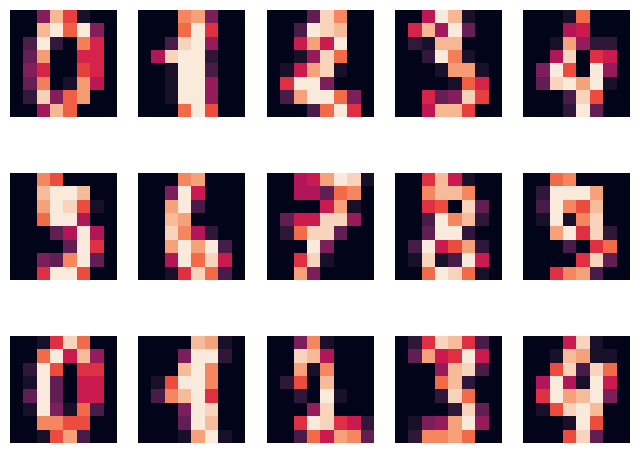

In [20]:
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in digits)
r, c = 3, 5
fig, ax = plt.subplots(r, c, sharex='col', sharey='row')
for i in range(r):
    for j in range(c):
        ax[i, j].axis('off')
        ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [21]:
data = np.r_[digits, friend_digits]
y = np.r_[y, df['y']]

In [25]:
embedding = TSNE(n_components=2,
        init="pca",
        n_iter_without_progress=150,
        perplexity=10,
        random_state=0)

e_data = embedding.fit_transform(data)

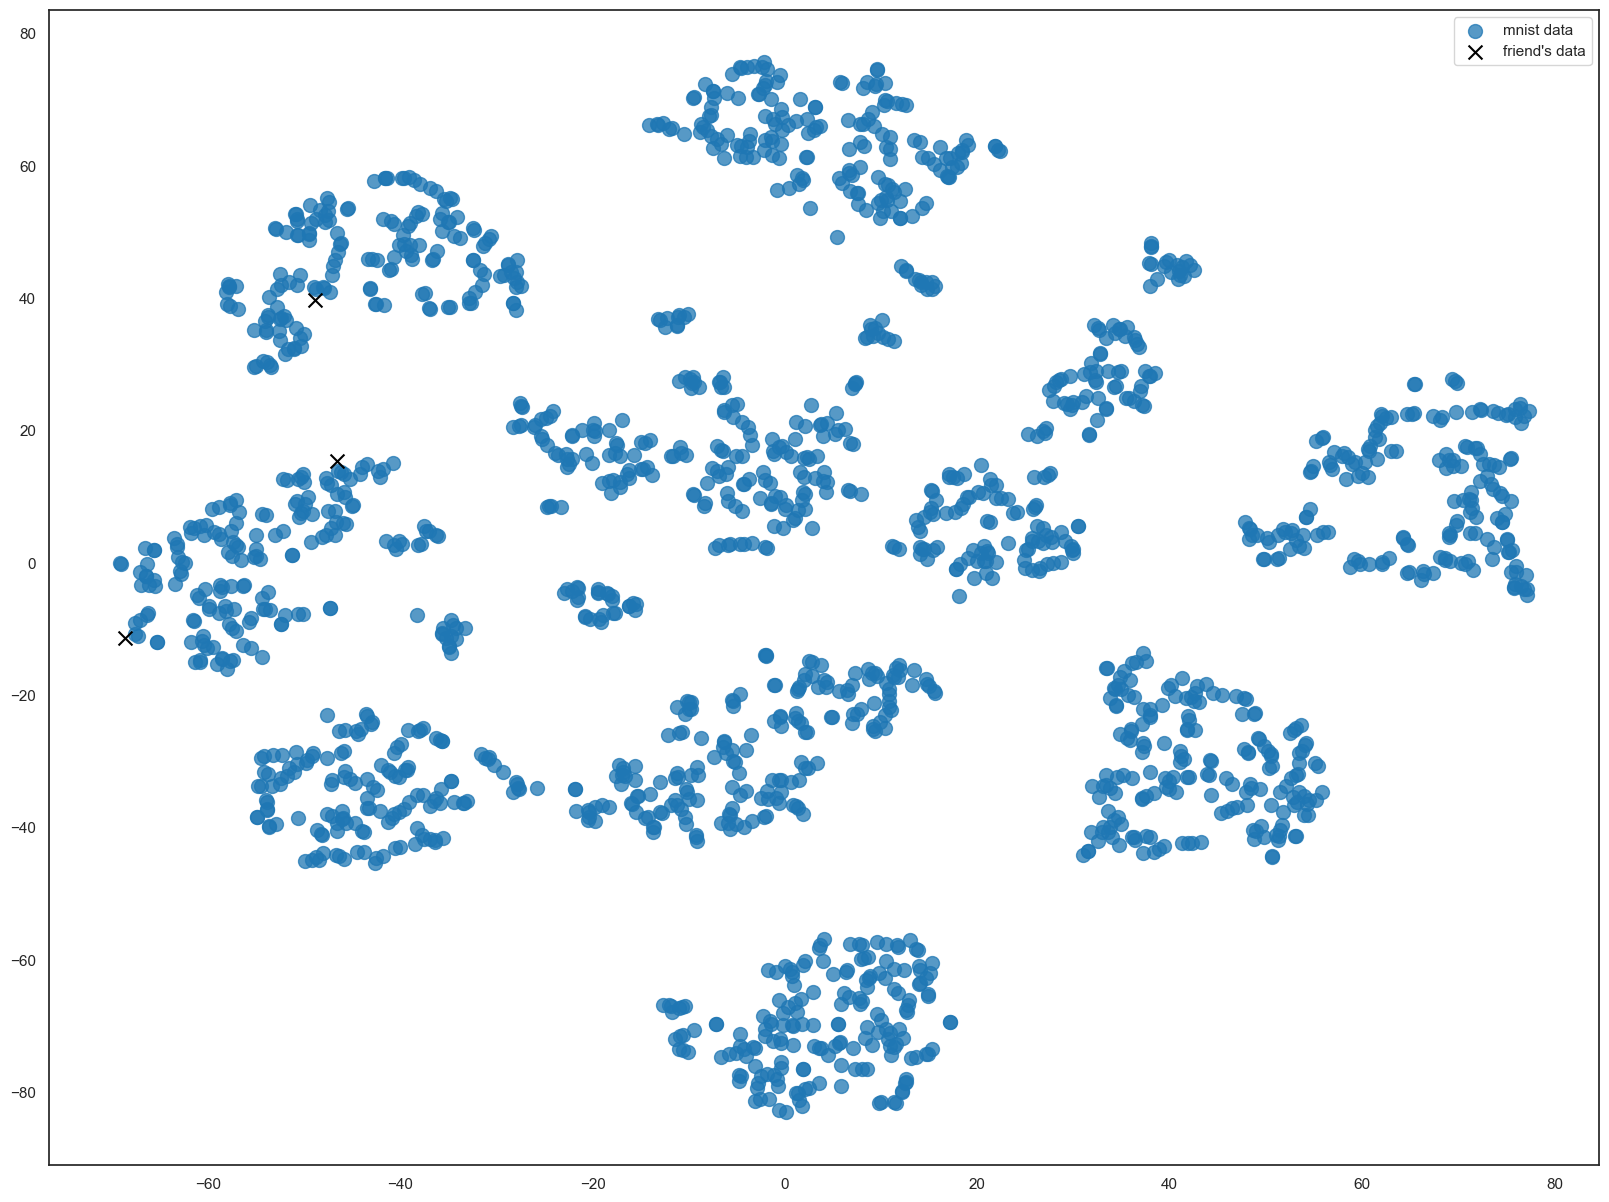

In [26]:
plt.rcParams['figure.figsize'] = (20,15)
n = friend_digits.shape[0]
plt.scatter(
    e_data[:-n, 0],
    e_data[:-n, 1],
    marker='o',
    alpha=0.75,
    label='mnist data',
    s=100)
plt.scatter(
    e_data[-n:, 0],
    e_data[-n:, 1],
    marker='x',
    color='black',
    label='friend\'s data',
    alpha=1,
    s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [27]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 18 clusters and 195 points of noise.


C:\Users\Florian-Music\AppData\Local\Temp\ipykernel_37364\992391530.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('brg', n_labels)


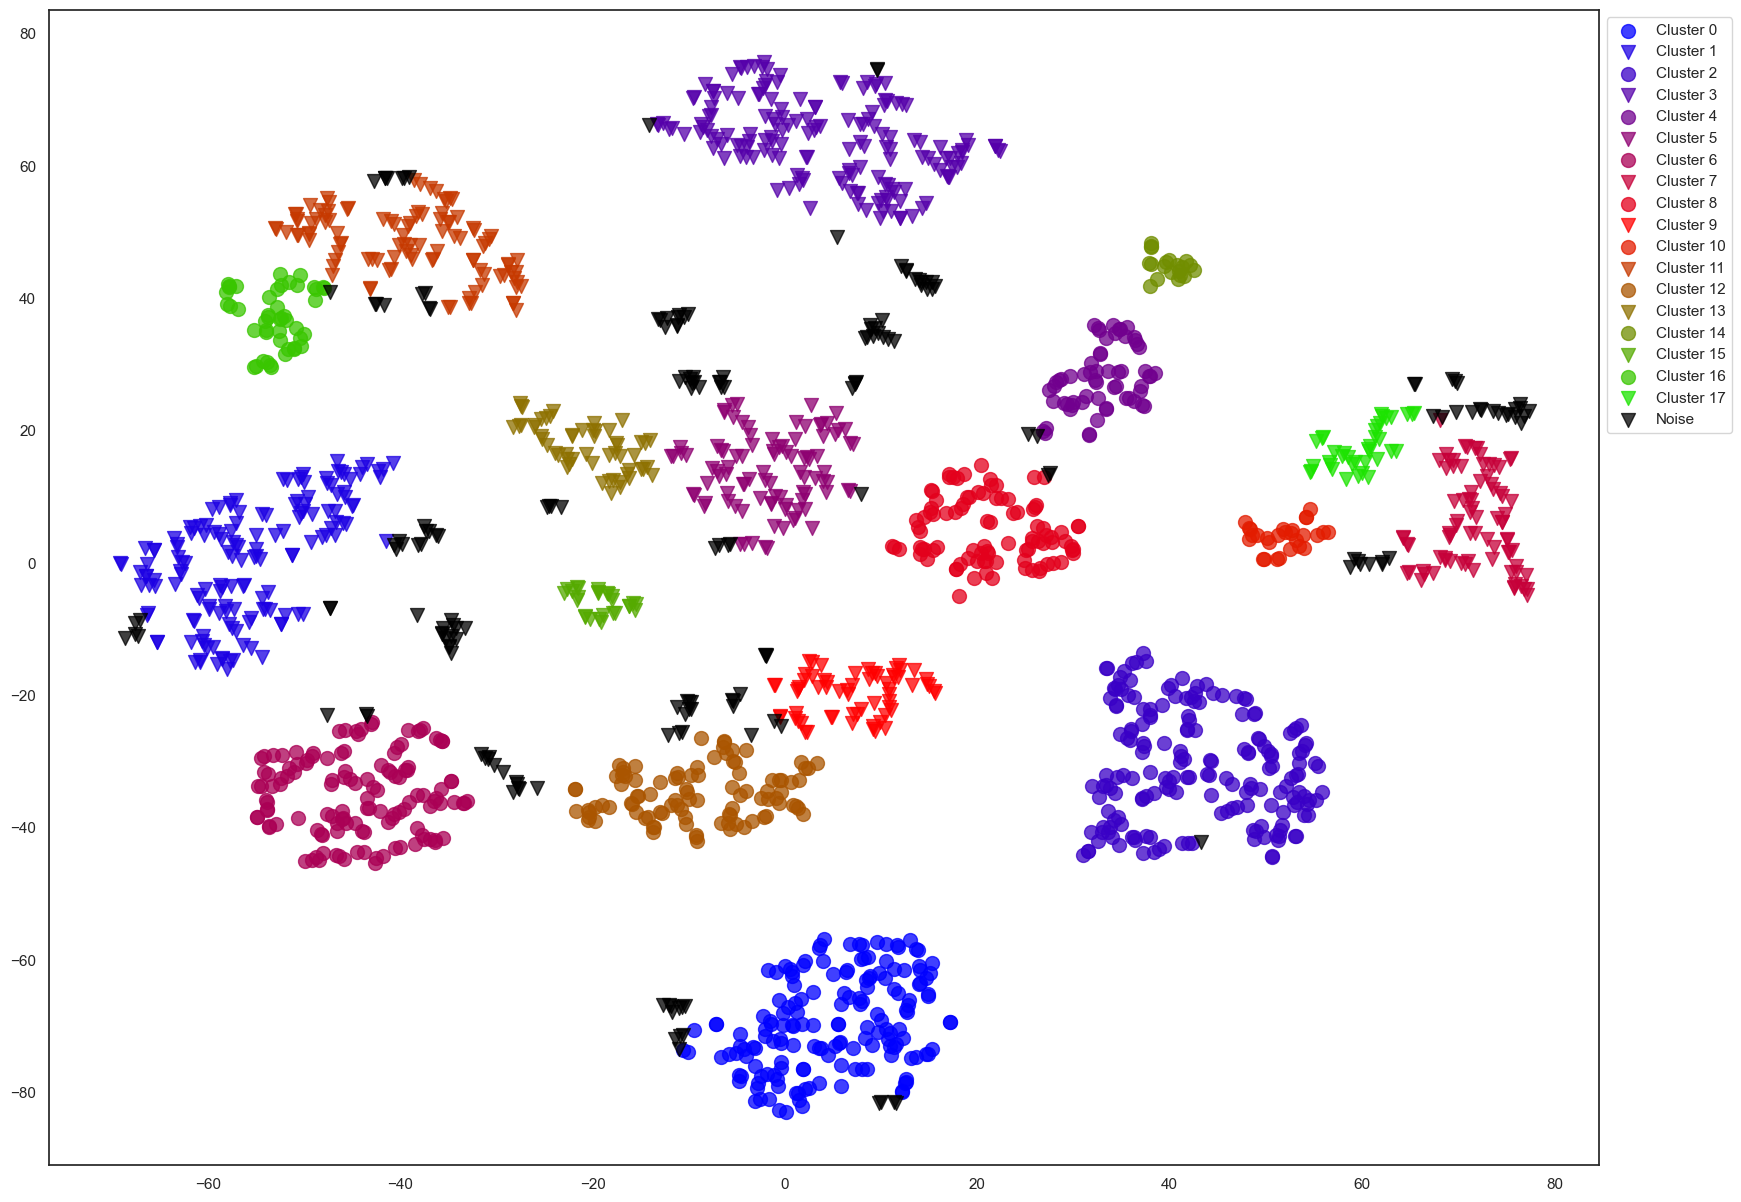

In [28]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],
        e_data[cluster.labels_ == l, 1],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [29]:
print("The predicted labels of our friend's handwriting:")
print(cluster.labels_[-3:])

The predicted labels of our friend's handwriting:
[-1 16  1]


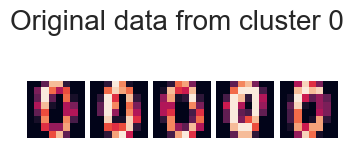

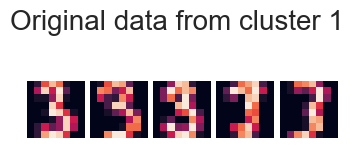

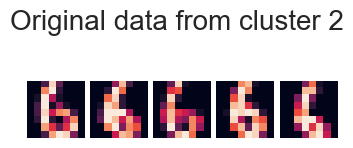

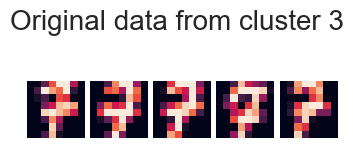

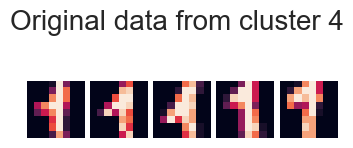

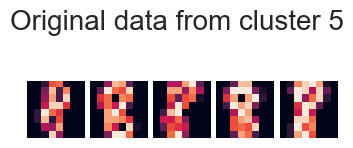

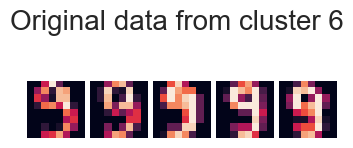

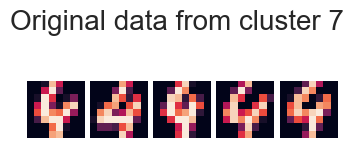

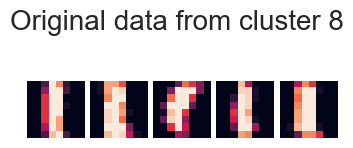

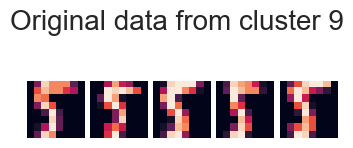

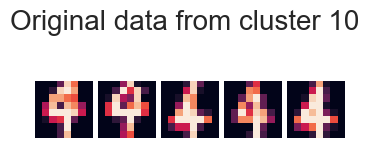

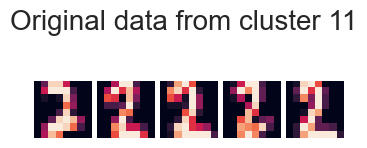

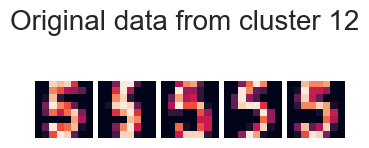

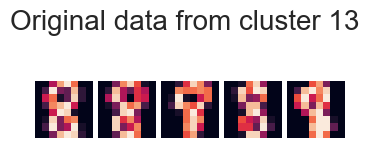

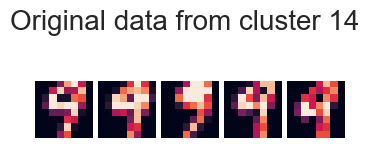

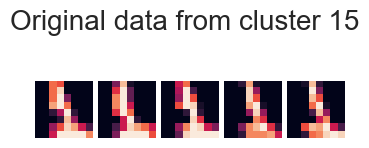

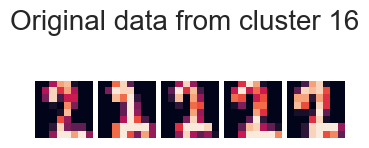

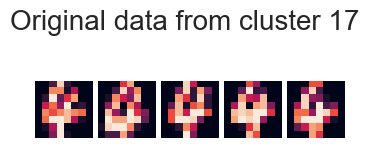

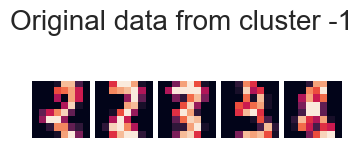

In [30]:
r, c = 1, 5
plt.rcParams['figure.figsize'] = (4*r,4*c)
for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r * c, replace=False)]
    it = (x.reshape(8, 8) for x in nums)
    fig, ax = plt.subplots(r, c)
    ax = ax.reshape(r, c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)
    for i in range(r):
        for j in range(c):
            ax[i, j].axis('off')
            ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Correct labels:


C:\Users\Florian-Music\AppData\Local\Temp\ipykernel_37364\2402479611.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('brg', n_labels)


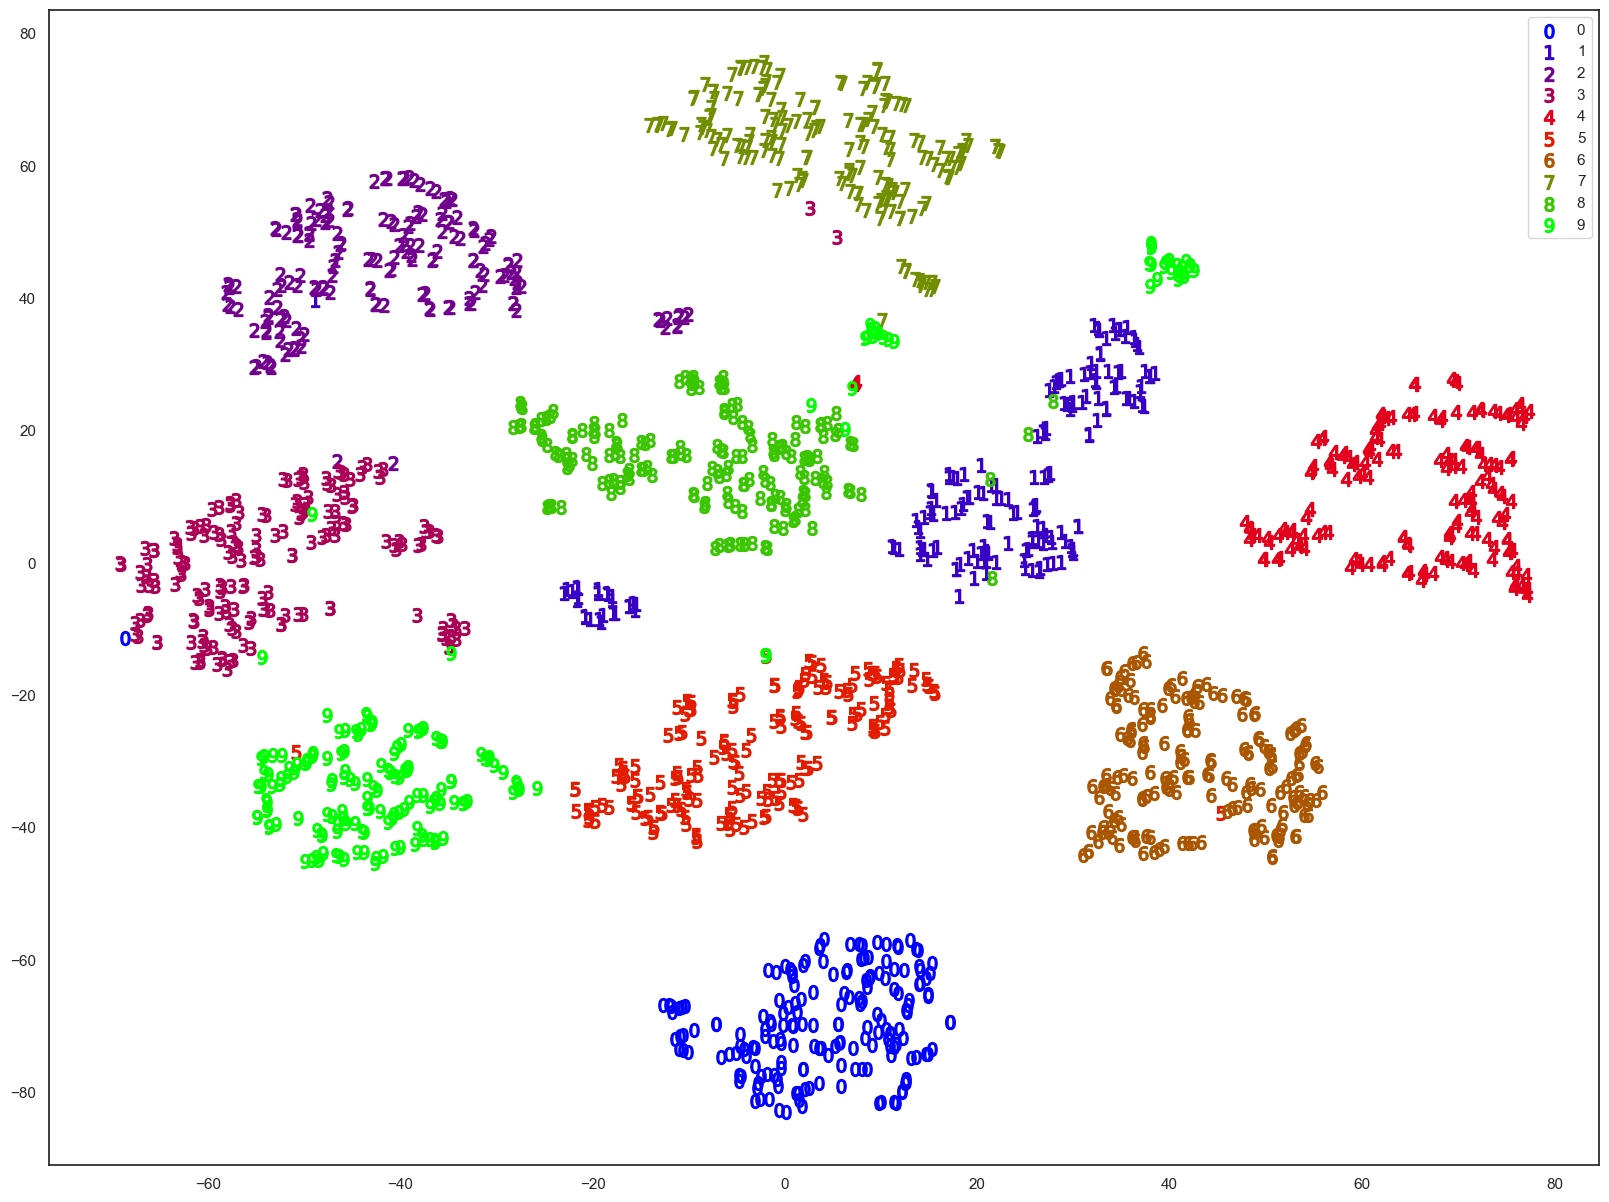

In [31]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',
        alpha=1,
        label=f'{l}',
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [32]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')
        
    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #-1
(IE: Noise)
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #16
Cluster 16 is 97.87% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #1
Cluster 1 is 97.42% the number 3
Your friend's 2th sample is supposed to be the number 2


## Exercise

We have some nondescript data that we'll perform the clustering on. For this DBSCAN is used.

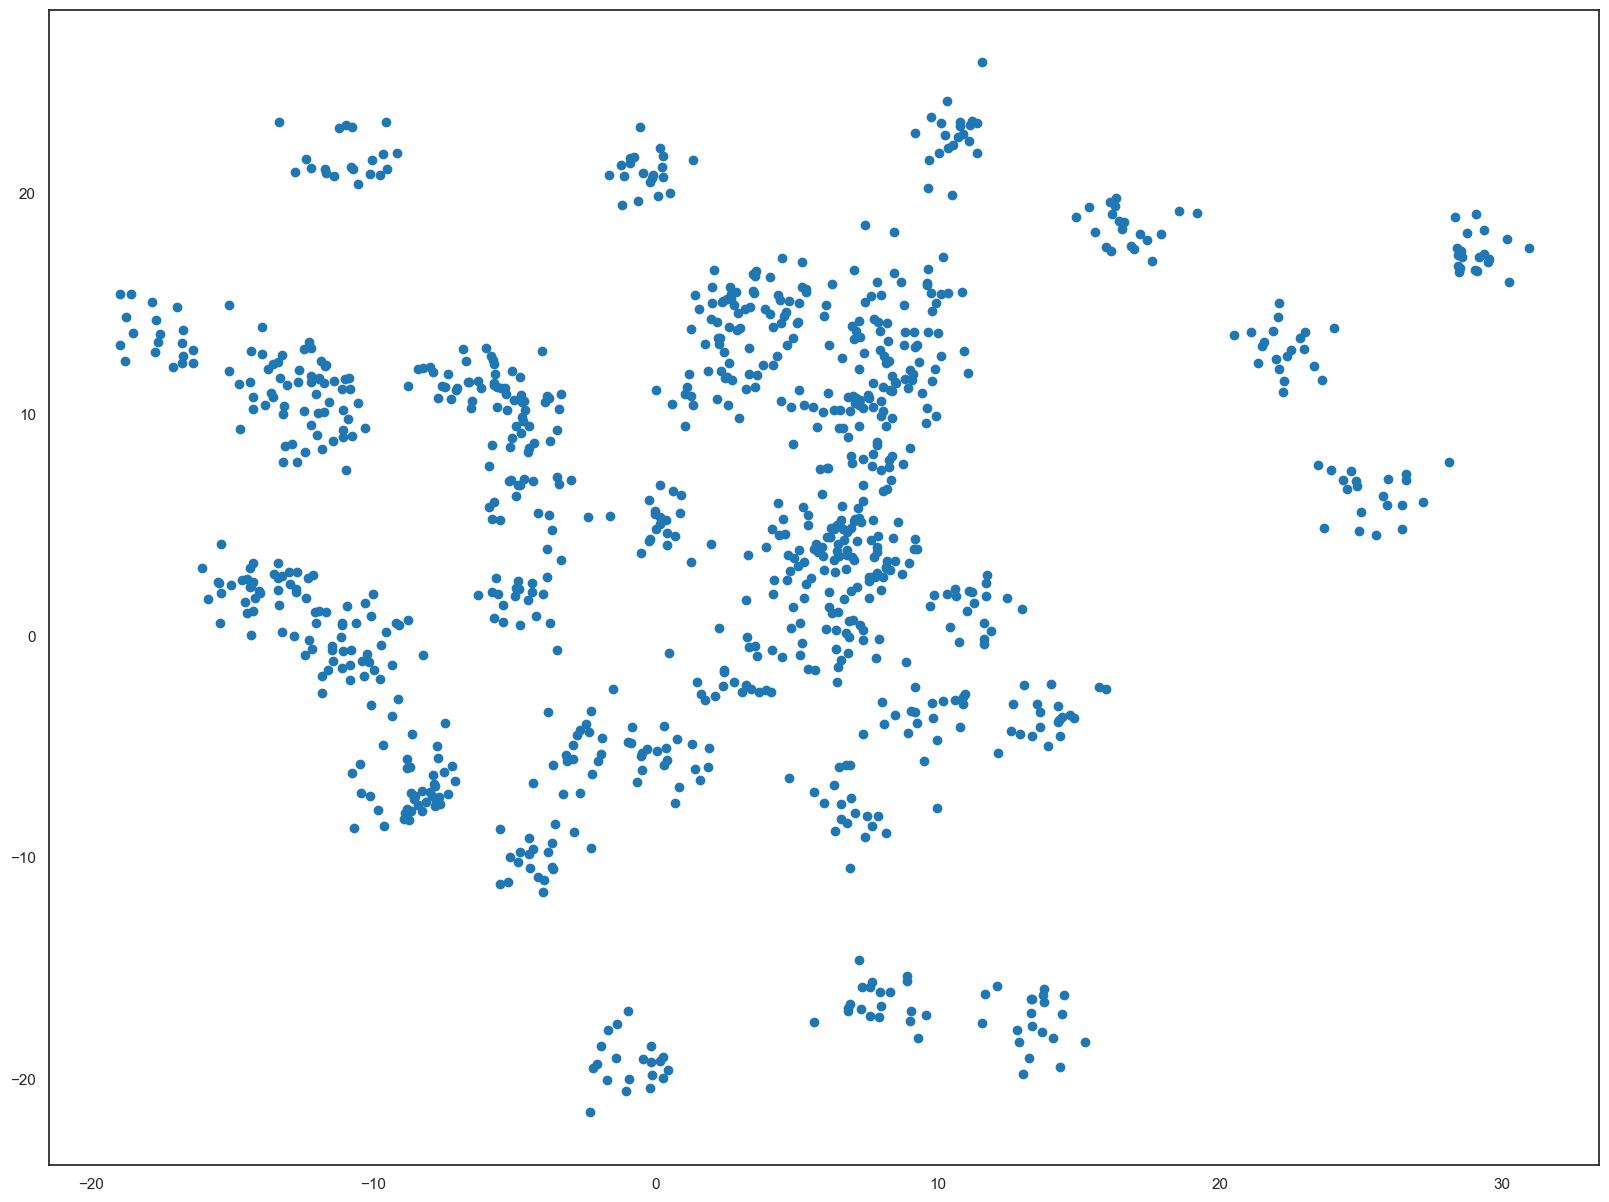

In [37]:
df = pl.read_csv("./data/DBSCAN_exercises.csv")
plt.scatter(df['x'], df['y'])
plt.show()

In [41]:
cluster = DBSCAN(eps=2, min_samples=10)
cluster = cluster.fit(df)

print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 15 clusters and 3 points of noise.


In [42]:
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}%')

0.3%


C:\Users\Florian-Music\AppData\Local\Temp\ipykernel_37364\3825814897.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('brg', n_labels)


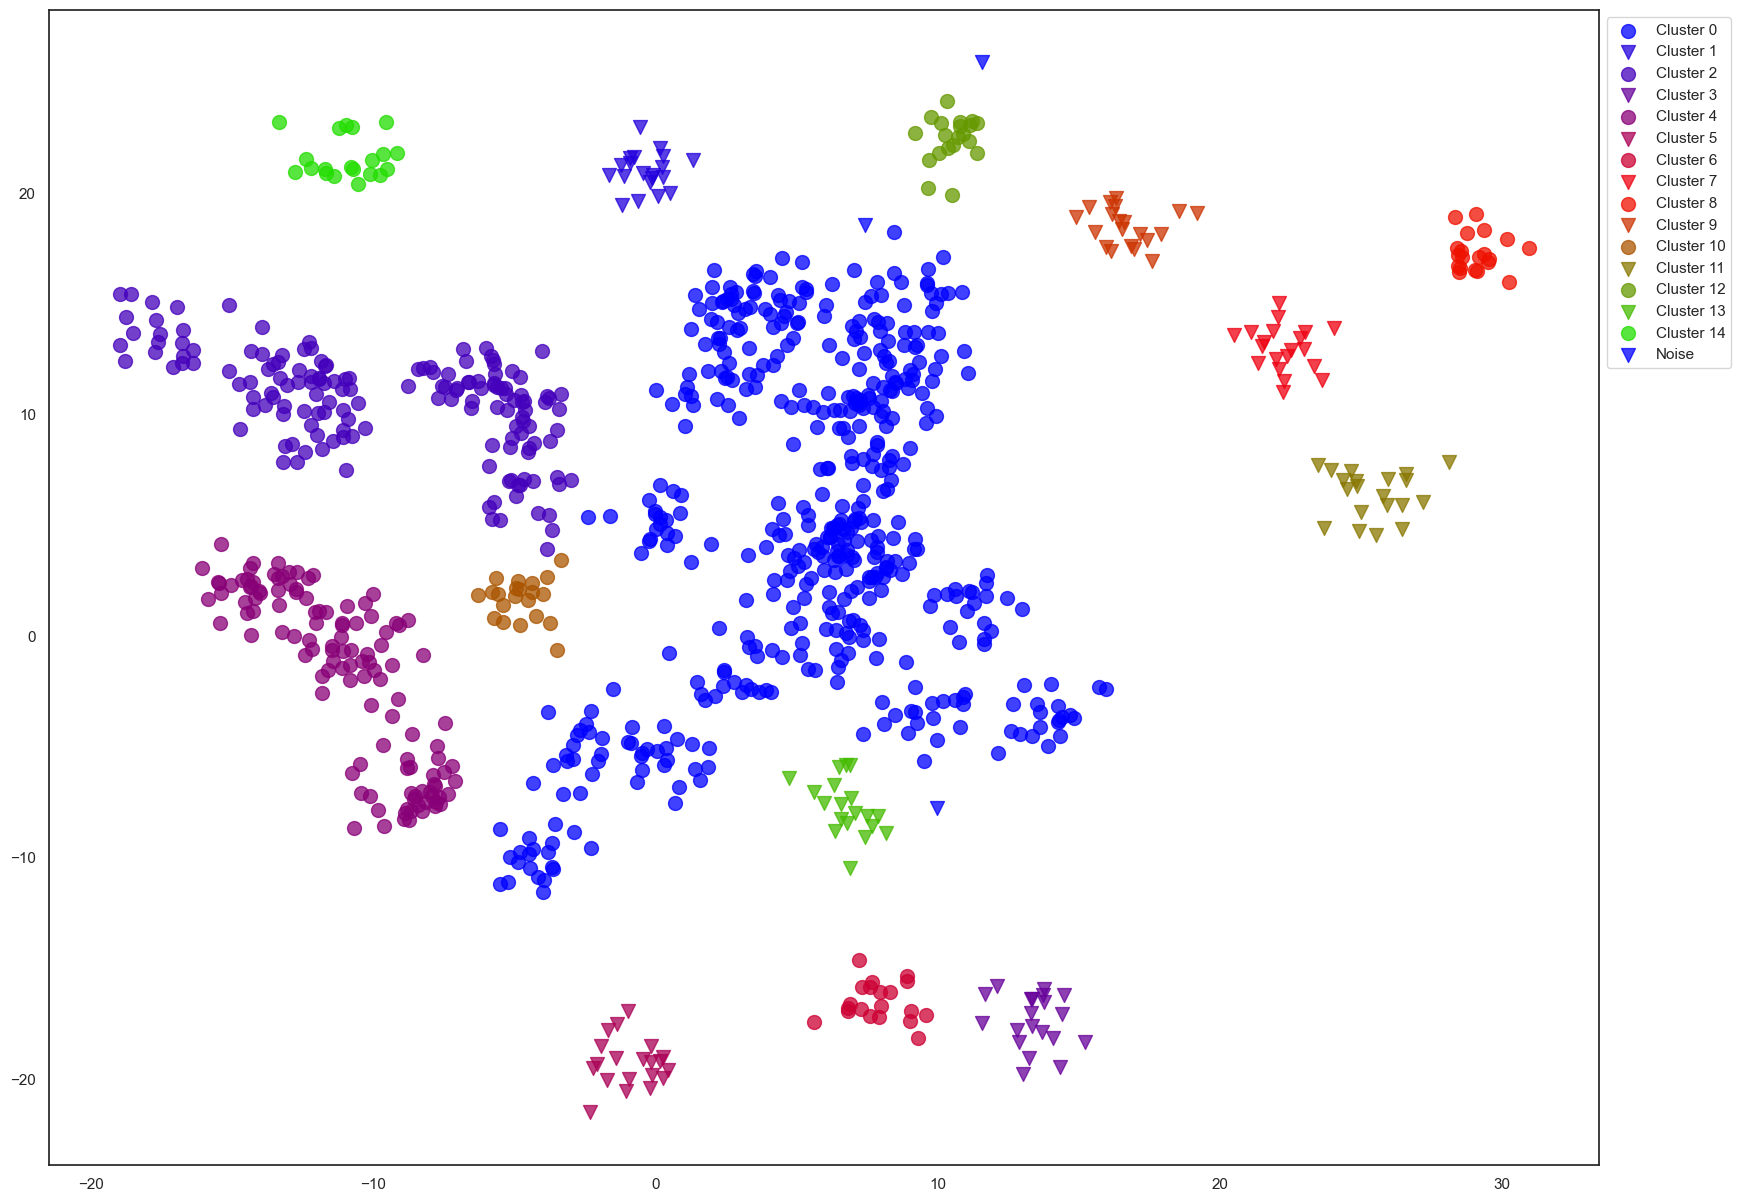

In [44]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        df['x'].filter(cluster.labels_ == l),
        df['y'].filter(cluster.labels_ == l),
        c=[cmap(l)],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']